# 2.5 GAN, Multi-class Weather Dataset for Image Classification

### Table of Contents
[Import Libraries and data](#Import-Libraries-and-data)  

optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"  
[Model 1 | Epochs = 10](#Model-1)  
[Model 2 | Epochs = 20](#Model-2)  
[Model 3 | Epochs = 30](#Model-3)  
[Model 4 | Epochs = 25](#Model-4)    
[Model 5 | Epochs = 50](#Model-5)  
[Model 6 | Epochs = 23](#Model-6)  
[Model 7 | Epochs = 27](#Model-7)  
[Model 8 | Epochs = 15](#Model-8)  
[Model 9 | Epochs = 18](#Model-9)  
[Model 10 | Epochs = 17](#Model-10)  
[Model 11 | Epochs = 16](#Model-11)   


[Results](#Results)

### 1. Import Libraries and data

In [1]:
from keras.utils import to_categorical

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras import utils
from numpy import unique, reshape, argmax, asarray
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import os
#download the weather images and put them in a directory
path = r'/Users/urvi/Desktop/Machine Learning with Python/Achivement 2/Climate wins 2/Data/Original data /Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', '.DS_Store', 'Shine', 'Sunrise']


In [3]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [7]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Model

# Define the CNN architecture
inputs = Input(shape=(250, 250, 3))  # Correcting the number of channels to 3

x = Conv2D(32, (5, 5), activation='relu')(inputs)
x = MaxPooling2D((3, 3))(x)
x = Conv2D(64, (5, 5), activation='relu')(x)
x = MaxPooling2D((3, 3))(x)
x = Conv2D(128, (5, 5), activation='relu')(x)
x = MaxPooling2D((3, 3))(x)
x = Flatten()(x)
x = Dropout(0.5, seed=5)(x)
x = Dense(128, activation='relu')(x)

outputs = Dense(4, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

### Model 1
optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"]
epochs = 10

In [5]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 10, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)
results = pd.DataFrame(model.history.history)

Epoch 1/10
28/28 [==============================] - 54s 2s/step - loss: 0.1217 - accuracy: 0.5972 - val_loss: 0.1017 - val_accuracy: 0.7054
Epoch 2/10
28/28 [==============================] - 54s 2s/step - loss: 0.0784 - accuracy: 0.7929 - val_loss: 0.0635 - val_accuracy: 0.8170
Epoch 3/10
28/28 [==============================] - 56s 2s/step - loss: 0.0680 - accuracy: 0.8113 - val_loss: 0.1217 - val_accuracy: 0.6830
Epoch 4/10
28/28 [==============================] - 53s 2s/step - loss: 0.0624 - accuracy: 0.8389 - val_loss: 0.1349 - val_accuracy: 0.6786
Epoch 5/10
28/28 [==============================] - 54s 2s/step - loss: 0.0666 - accuracy: 0.8113 - val_loss: 0.0717 - val_accuracy: 0.8080
Epoch 6/10
28/28 [==============================] - 55s 2s/step - loss: 0.0641 - accuracy: 0.8308 - val_loss: 0.0560 - val_accuracy: 0.8438
Epoch 7/10
28/28 [==============================] - 55s 2s/step - loss: 0.0557 - accuracy: 0.8527 - val_loss: 0.0810 - val_accuracy: 0.8036
Epoch 8/10
28/28 [==

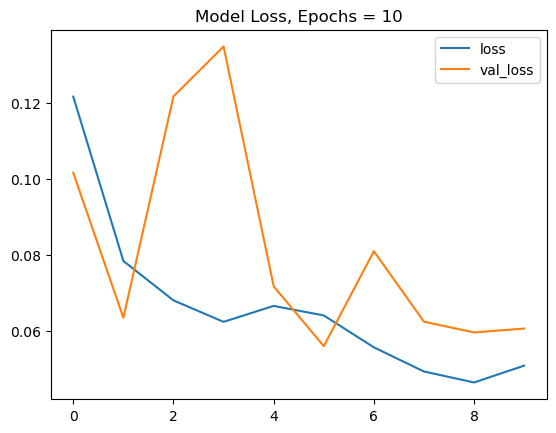

In [6]:
results[['loss','val_loss']].plot(title='Model Loss, Epochs = 10')
plt.savefig('./loss_10.png')

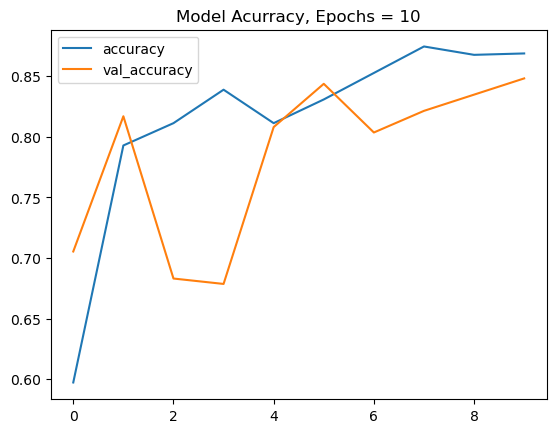

In [7]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy, Epochs = 10')
plt.savefig('./accuracy_10.png')

In [8]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.8688147068023682, Val_Accuracy: 0.8482142686843872
Loss: 0.0508623830974102, Val_Loss: 0.06061976030468941


51/51 [==============================] - 28s 539ms/step


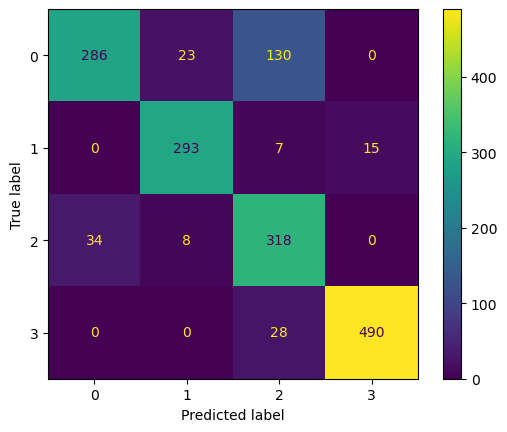

<Figure size 640x480 with 0 Axes>

In [11]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 50 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plt.savefig('confusion_matrix_gan10.png')

In [16]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 [==============================] - 0s 489ms/step


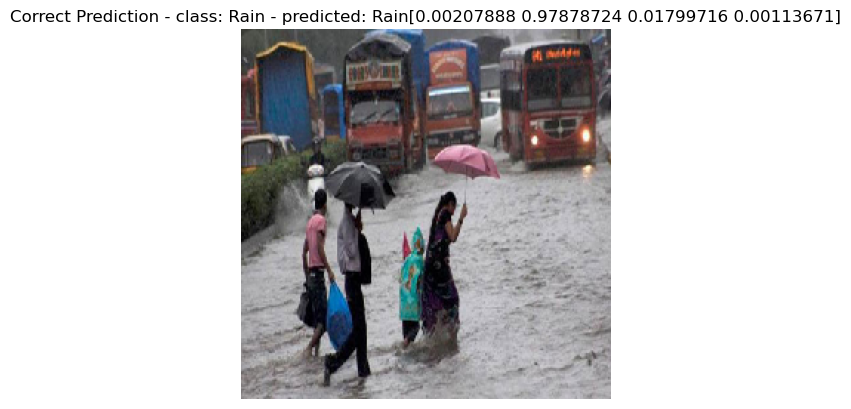

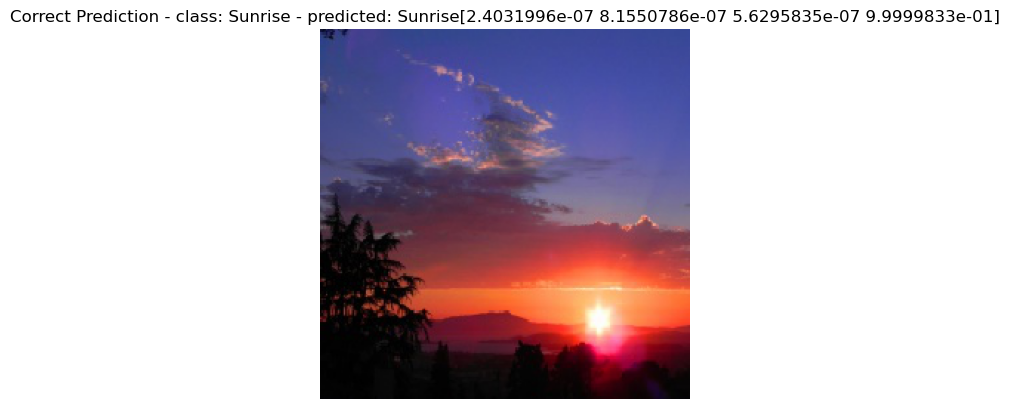

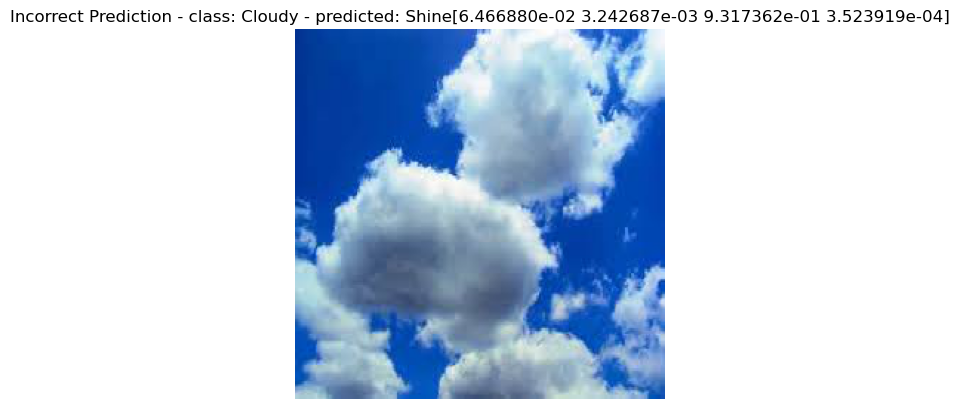

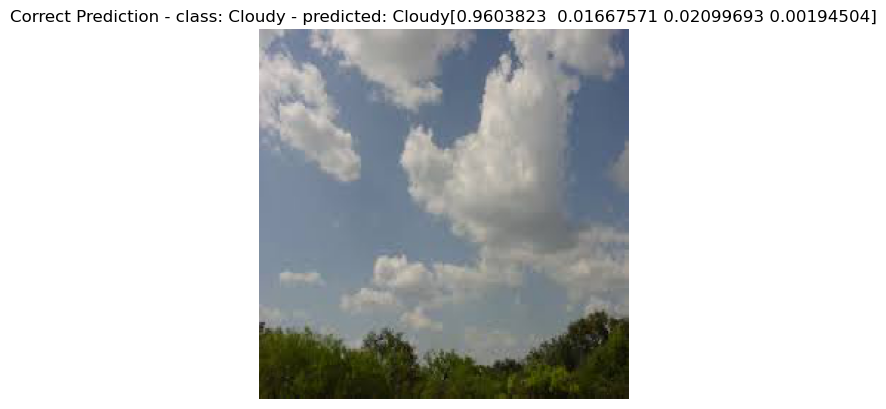

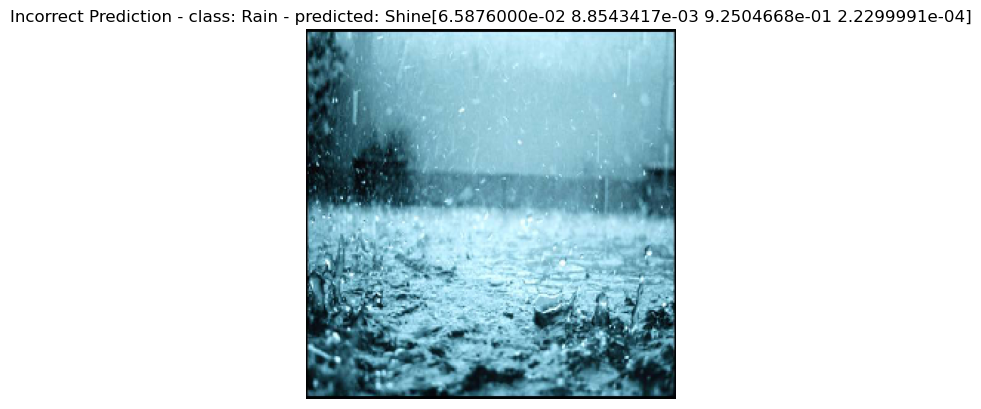

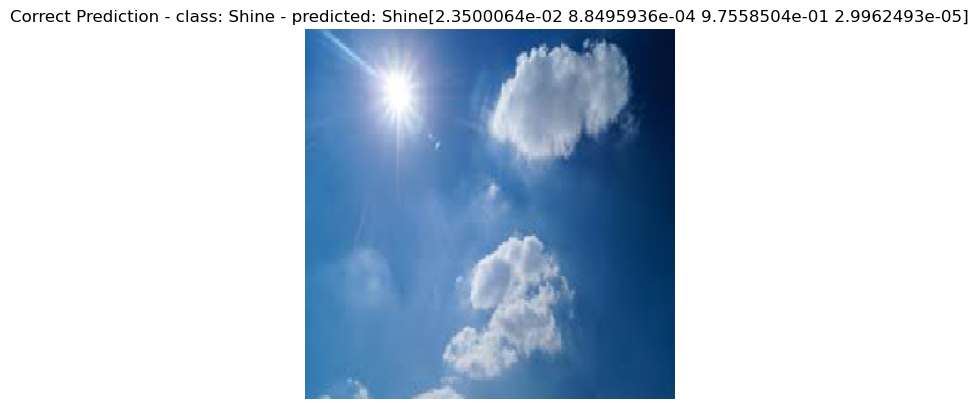

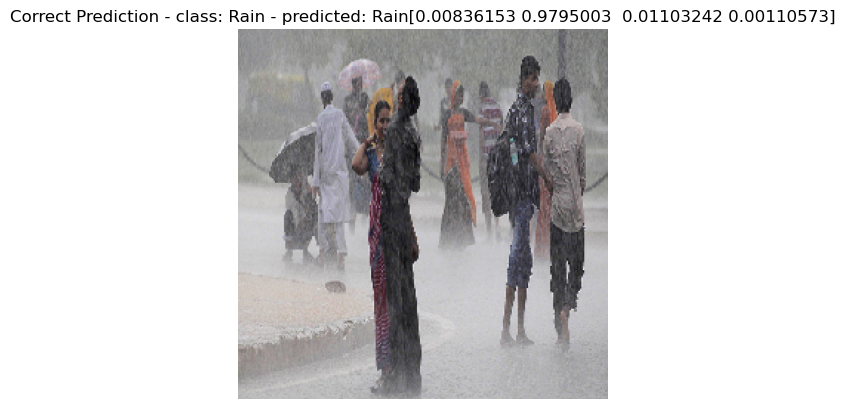

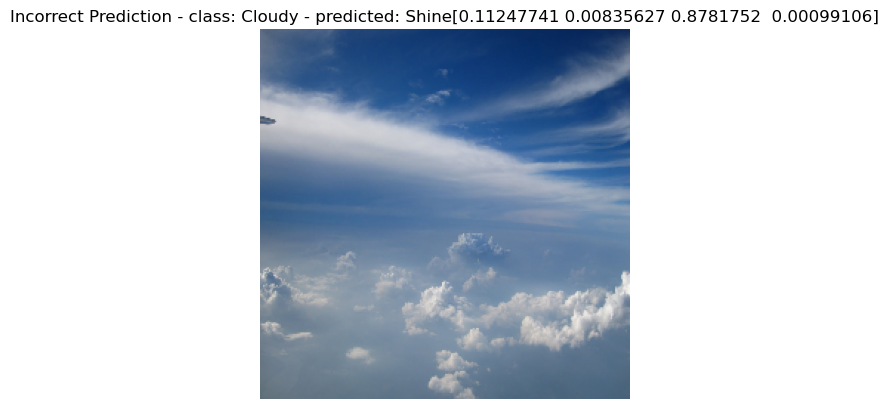

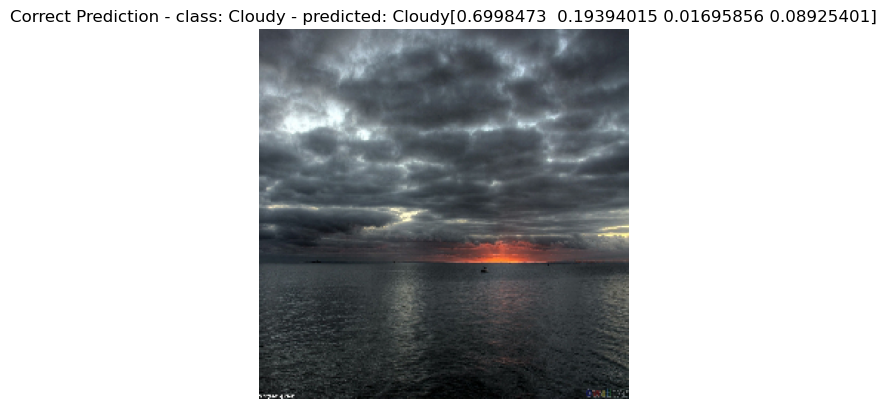

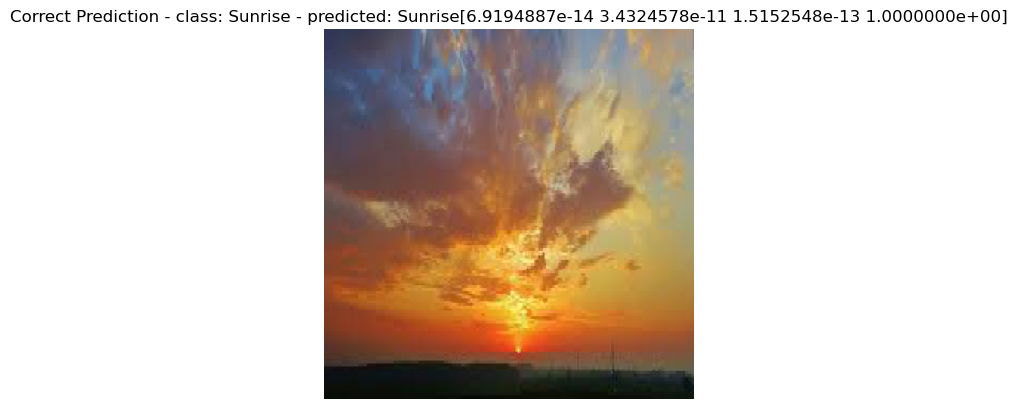

In [18]:
predict_one(model, 10) #<--you can show multiple pictures with this command. Just fill in the number you want to see.

#### Model 2
epochs = 20

[Go back to the Table of Contents](#Table-of-Contents)

In [21]:
#compile and run the model
#how many epochs are required to generate an accurate model?
model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 20, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)
results_model2 = pd.DataFrame(model.history.history)

Epoch 1/20
28/28 [==============================] - 64s 2s/step - loss: 0.0247 - accuracy: 0.9402 - val_loss: 0.1014 - val_accuracy: 0.7545
Epoch 2/20
28/28 [==============================] - 66s 2s/step - loss: 0.0250 - accuracy: 0.9356 - val_loss: 0.0590 - val_accuracy: 0.8259
Epoch 3/20
28/28 [==============================] - 58s 2s/step - loss: 0.0186 - accuracy: 0.9563 - val_loss: 0.0586 - val_accuracy: 0.8571
Epoch 4/20
28/28 [==============================] - 60s 2s/step - loss: 0.0179 - accuracy: 0.9528 - val_loss: 0.0715 - val_accuracy: 0.8080
Epoch 5/20
28/28 [==============================] - 60s 2s/step - loss: 0.0221 - accuracy: 0.9425 - val_loss: 0.0584 - val_accuracy: 0.8616
Epoch 6/20
28/28 [==============================] - 58s 2s/step - loss: 0.0176 - accuracy: 0.9551 - val_loss: 0.0652 - val_accuracy: 0.8527
Epoch 7/20
28/28 [==============================] - 60s 2s/step - loss: 0.0144 - accuracy: 0.9666 - val_loss: 0.0646 - val_accuracy: 0.8393
Epoch 8/20
28/28 [==

Accuracy_20: 0.9723820686340332, Val_Accuracy: 0.8616071343421936
Loss_20: 0.011125574819743633, Val_Loss: 0.05805978178977966


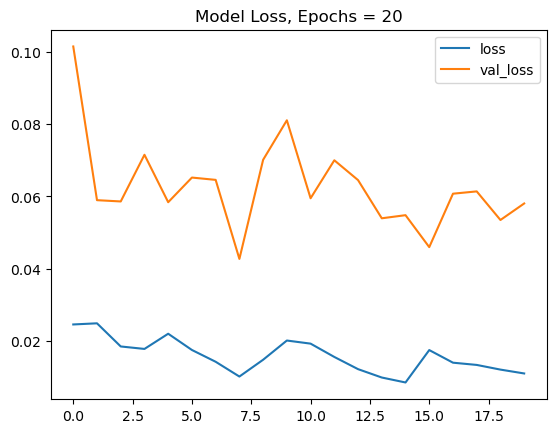

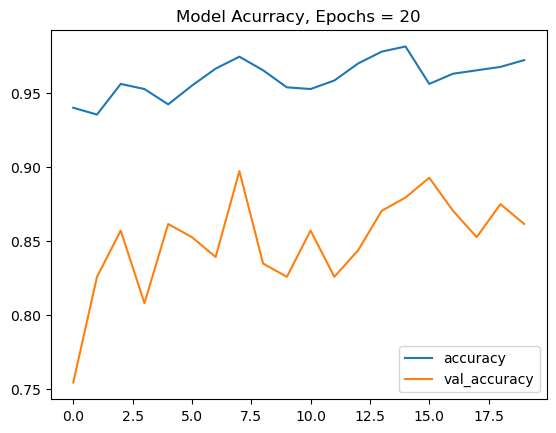

In [22]:
results_model2[['loss','val_loss']].plot(title='Model Loss, Epochs = 20')
plt.savefig('./loss_20.png')

results_model2[['accuracy','val_accuracy']].plot(title='Model Acurracy, Epochs = 20')
plt.savefig('./accuracy_20.png')

# Print the accuracy and loss
print("Accuracy_20: {}, Val_Accuracy: {}".format(results_model2['accuracy'].iloc[-1], results_model2['val_accuracy'].iloc[-1]))
print("Loss_20: {}, Val_Loss: {}".format(results_model2['loss'].iloc[-1], results_model2['val_loss'].iloc[-1]))

101/101 [==============================] - 59s 583ms/step


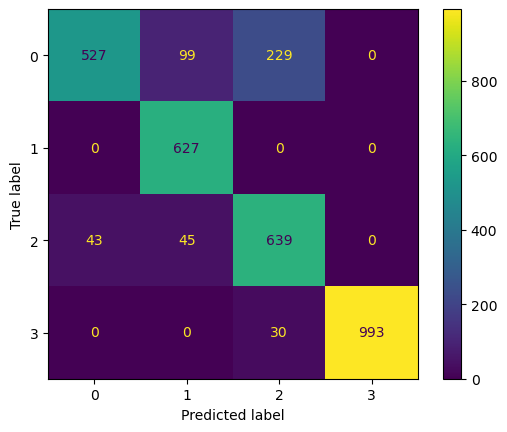

<Figure size 640x480 with 0 Axes>

In [23]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 100 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plt.savefig('confusion_matrix_gan20.png')

### Model 3
epochs = 30

[Go back to the table of Contents](#Table-of-Contents)

In [24]:
#compile and run the model
#how many epochs are required to generate an accurate model?
model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 30, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

results_model3 = pd.DataFrame(model.history.history)
print(results_model3.columns)

Epoch 1/30
28/28 [==============================] - 61s 2s/step - loss: 0.0183 - accuracy: 0.9482 - val_loss: 0.0521 - val_accuracy: 0.8795
Epoch 2/30
28/28 [==============================] - 69s 2s/step - loss: 0.0160 - accuracy: 0.9597 - val_loss: 0.0654 - val_accuracy: 0.8527
Epoch 3/30
28/28 [==============================] - 62s 2s/step - loss: 0.0163 - accuracy: 0.9574 - val_loss: 0.0919 - val_accuracy: 0.7991
Epoch 4/30
28/28 [==============================] - 58s 2s/step - loss: 0.0186 - accuracy: 0.9540 - val_loss: 0.0562 - val_accuracy: 0.8661
Epoch 5/30
28/28 [==============================] - 59s 2s/step - loss: 0.0097 - accuracy: 0.9788 - val_loss: 0.0659 - val_accuracy: 0.8527
Epoch 6/30
28/28 [==============================] - 56s 2s/step - loss: 0.0080 - accuracy: 0.9770 - val_loss: 0.0562 - val_accuracy: 0.8705
Epoch 7/30
28/28 [==============================] - 56s 2s/step - loss: 0.0039 - accuracy: 0.9919 - val_loss: 0.0566 - val_accuracy: 0.8705
Epoch 8/30
28/28 [==

Accuracy_30: 0.9933035969734192, Val_Accuracy: 0.8482142686843872
Loss_30: 0.003198005957528949, Val_Loss: 0.06535039097070694


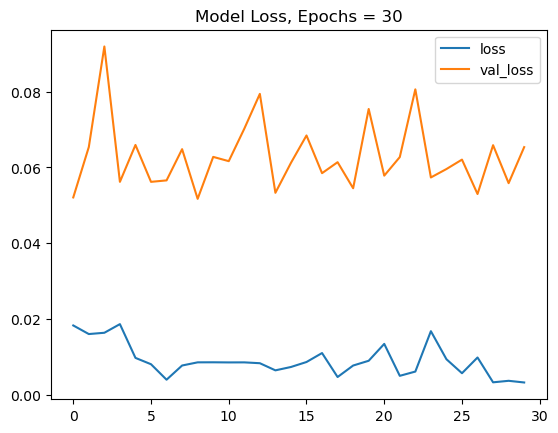

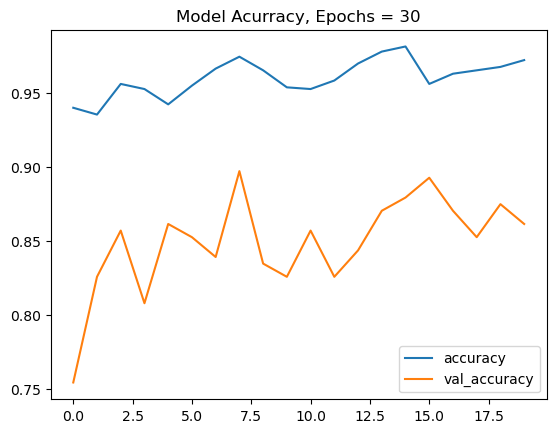

In [25]:
results_model3[['loss','val_loss']].plot(title='Model Loss, Epochs = 30')
plt.savefig('./loss_30.png')

results_model2[['accuracy','val_accuracy']].plot(title='Model Acurracy, Epochs = 30')
plt.savefig('./accuracy_30.png')


# Print the accuracy and loss
print("Accuracy_30: {}, Val_Accuracy: {}".format(results_model3['accuracy'].iloc[-1], results_model3['val_accuracy'].iloc[-1]))
print("Loss_30: {}, Val_Loss: {}".format(results_model3['loss'].iloc[-1], results_model3['val_loss'].iloc[-1]))

101/101 [==============================] - 54s 533ms/step


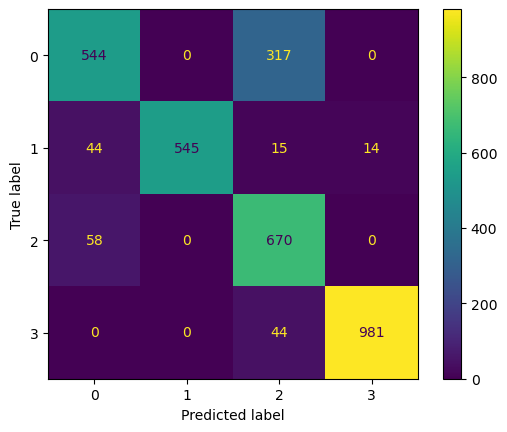

<Figure size 640x480 with 0 Axes>

In [26]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 100 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plt.savefig('confusion_matrix_gan30.png')

### Model 4
epochs = 25

[Go back to Table of Contents](#Table-of-Contents)

In [27]:
#compile and run the model
#how many epochs are required to generate an accurate model?
model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 25, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

results_model4 = pd.DataFrame(model.history.history)
print(results_model4.columns)

Epoch 1/25
28/28 [==============================] - 57s 2s/step - loss: 0.0100 - accuracy: 0.9735 - val_loss: 0.0661 - val_accuracy: 0.8482
Epoch 2/25
28/28 [==============================] - 54s 2s/step - loss: 0.0060 - accuracy: 0.9862 - val_loss: 0.0611 - val_accuracy: 0.8661
Epoch 3/25
28/28 [==============================] - 54s 2s/step - loss: 0.0125 - accuracy: 0.9712 - val_loss: 0.0929 - val_accuracy: 0.8080
Epoch 4/25
28/28 [==============================] - 54s 2s/step - loss: 0.0144 - accuracy: 0.9643 - val_loss: 0.0737 - val_accuracy: 0.8304
Epoch 5/25
28/28 [==============================] - 57s 2s/step - loss: 0.0151 - accuracy: 0.9620 - val_loss: 0.0876 - val_accuracy: 0.8125
Epoch 6/25
28/28 [==============================] - 56s 2s/step - loss: 0.0099 - accuracy: 0.9781 - val_loss: 0.0683 - val_accuracy: 0.8438
Epoch 7/25
28/28 [==============================] - 54s 2s/step - loss: 0.0114 - accuracy: 0.9724 - val_loss: 0.0560 - val_accuracy: 0.8750
Epoch 8/25
28/28 [==

Accuracy_25: 0.9827387928962708, Val_Accuracy: 0.8705357313156128
Loss_25: 0.007067148573696613, Val_Loss: 0.06165635585784912


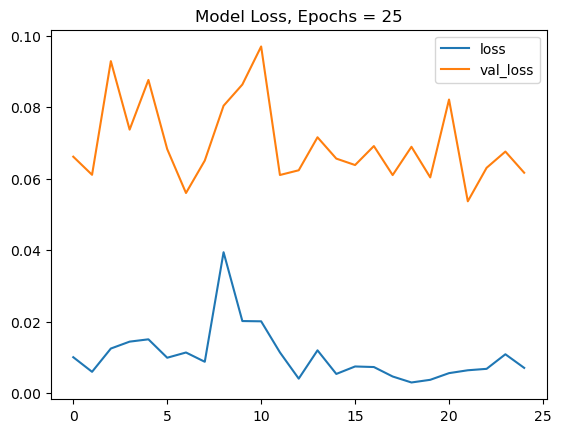

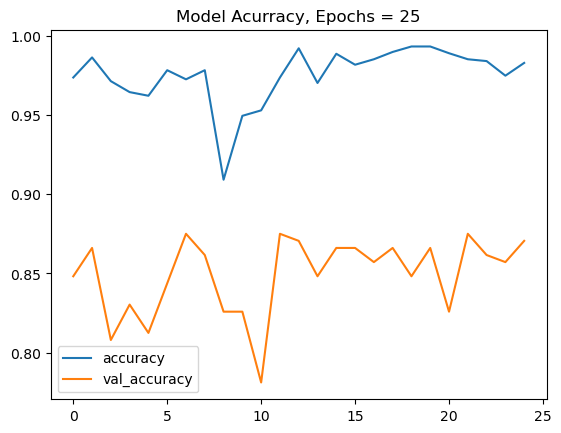

In [28]:
results_model4[['loss','val_loss']].plot(title='Model Loss, Epochs = 25')
plt.savefig('./loss_25.png')

results_model4[['accuracy','val_accuracy']].plot(title='Model Acurracy, Epochs = 25')
plt.savefig('./accuracy_25.png')


# Print the accuracy and loss
print("Accuracy_25: {}, Val_Accuracy: {}".format(results_model4['accuracy'].iloc[-1], results_model4['val_accuracy'].iloc[-1]))
print("Loss_25: {}, Val_Loss: {}".format(results_model4['loss'].iloc[-1], results_model4['val_loss'].iloc[-1]))

101/101 [==============================] - 53s 524ms/step


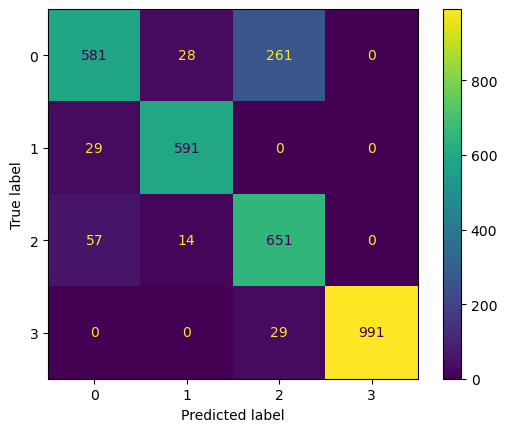

<Figure size 640x480 with 0 Axes>

In [29]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 100 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plt.savefig('confusion_matrix_gan30.png')
# confusion_matrix_gan30 --> confusion_matrix_gan25

### Model 5
epochs = 50

[Go back to Table of Contents](#Table-of-Contents)

In [30]:
#compile and run the model
#how many epochs are required to generate an accurate model?
model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 50, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

results_model5 = pd.DataFrame(model.history.history)
print(results_model5.columns)

Epoch 1/50
28/28 [==============================] - 67s 2s/step - loss: 0.0157 - accuracy: 0.9643 - val_loss: 0.0774 - val_accuracy: 0.8348
Epoch 2/50
28/28 [==============================] - 62s 2s/step - loss: 0.0111 - accuracy: 0.9724 - val_loss: 0.0673 - val_accuracy: 0.8482
Epoch 3/50
28/28 [==============================] - 61s 2s/step - loss: 0.0059 - accuracy: 0.9873 - val_loss: 0.0754 - val_accuracy: 0.8348
Epoch 4/50
28/28 [==============================] - 63s 2s/step - loss: 0.0100 - accuracy: 0.9793 - val_loss: 0.0837 - val_accuracy: 0.8170
Epoch 5/50
28/28 [==============================] - 60s 2s/step - loss: 0.0079 - accuracy: 0.9804 - val_loss: 0.0648 - val_accuracy: 0.8616
Epoch 6/50
28/28 [==============================] - 54s 2s/step - loss: 0.0028 - accuracy: 0.9942 - val_loss: 0.0660 - val_accuracy: 0.8571
Epoch 7/50
28/28 [==============================] - 55s 2s/step - loss: 0.0079 - accuracy: 0.9781 - val_loss: 0.0773 - val_accuracy: 0.8304
Epoch 8/50
28/28 [==

Accuracy_25: 0.9919447898864746, Val_Accuracy: 0.8526785969734192
Loss_25: 0.003706784686073661, Val_Loss: 0.06982086598873138


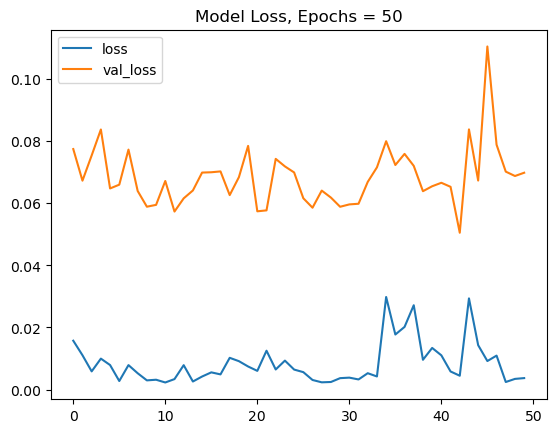

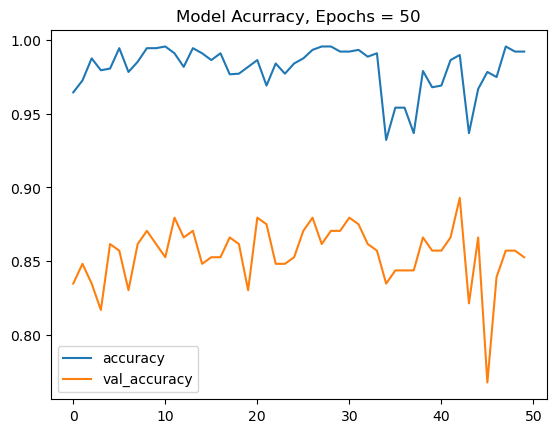

In [31]:
results_model5[['loss','val_loss']].plot(title='Model Loss, Epochs = 50')
plt.savefig('./loss_50.png')

results_model5[['accuracy','val_accuracy']].plot(title='Model Acurracy, Epochs = 50')
plt.savefig('./accuracy_50.png')


# Print the accuracy and loss
print("Accuracy_25: {}, Val_Accuracy: {}".format(results_model5['accuracy'].iloc[-1], results_model5['val_accuracy'].iloc[-1]))
print("Loss_25: {}, Val_Loss: {}".format(results_model5['loss'].iloc[-1], results_model5['val_loss'].iloc[-1]))

101/101 [==============================] - 66s 645ms/step


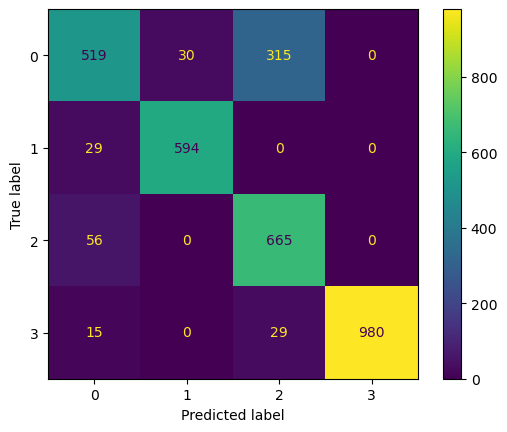

<Figure size 640x480 with 0 Axes>

In [32]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 100 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plt.savefig('confusion_matrix_gan50.png')

### Model 6
epochs = 23

[Go back to Table of Contents](#Table-of-Contents)

In [33]:
#compile and run the model
#how many epochs are required to generate an accurate model?
model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 23, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

results_model6 = pd.DataFrame(model.history.history)
print(results_model6.columns)

Epoch 1/23
28/28 [==============================] - 75s 3s/step - loss: 0.0066 - accuracy: 0.9850 - val_loss: 0.0732 - val_accuracy: 0.8527
Epoch 2/23
28/28 [==============================] - 69s 2s/step - loss: 0.0058 - accuracy: 0.9862 - val_loss: 0.0810 - val_accuracy: 0.8348
Epoch 3/23
28/28 [==============================] - 67s 2s/step - loss: 0.0071 - accuracy: 0.9850 - val_loss: 0.0623 - val_accuracy: 0.8705
Epoch 4/23
28/28 [==============================] - 72s 3s/step - loss: 0.0060 - accuracy: 0.9862 - val_loss: 0.0920 - val_accuracy: 0.8125
Epoch 5/23
28/28 [==============================] - 60s 2s/step - loss: 0.0078 - accuracy: 0.9816 - val_loss: 0.0594 - val_accuracy: 0.8705
Epoch 6/23
28/28 [==============================] - 67s 2s/step - loss: 0.0035 - accuracy: 0.9931 - val_loss: 0.0690 - val_accuracy: 0.8571
Epoch 7/23
28/28 [==============================] - 64s 2s/step - loss: 0.0051 - accuracy: 0.9873 - val_loss: 0.0769 - val_accuracy: 0.8438
Epoch 8/23
28/28 [==

Accuracy : 0.9574223160743713, Val_Accuracy: 0.7946428656578064
Loss: 0.02004469744861126, Val_Loss: 0.10213132947683334


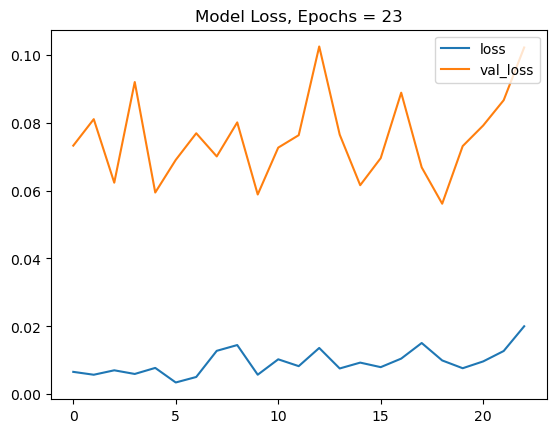

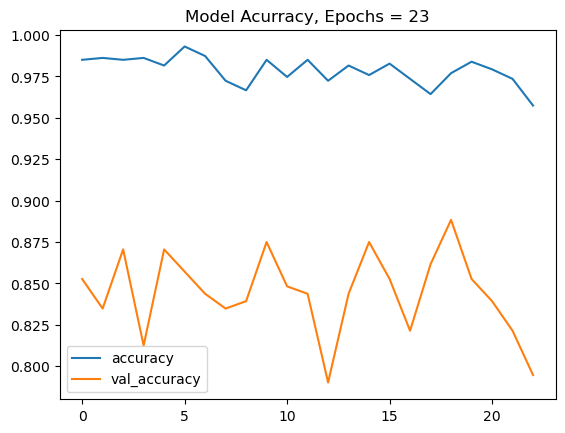

In [34]:
results_model6[['loss','val_loss']].plot(title='Model Loss, Epochs = 23')
plt.savefig('./loss_23.png')

results_model6[['accuracy','val_accuracy']].plot(title='Model Acurracy, Epochs = 23')
plt.savefig('./accuracy_23.png')


# Print the accuracy and loss
print("Accuracy : {}, Val_Accuracy: {}".format(results_model6['accuracy'].iloc[-1], results_model6['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results_model6['loss'].iloc[-1], results_model6['val_loss'].iloc[-1]))

101/101 [==============================] - 61s 602ms/step


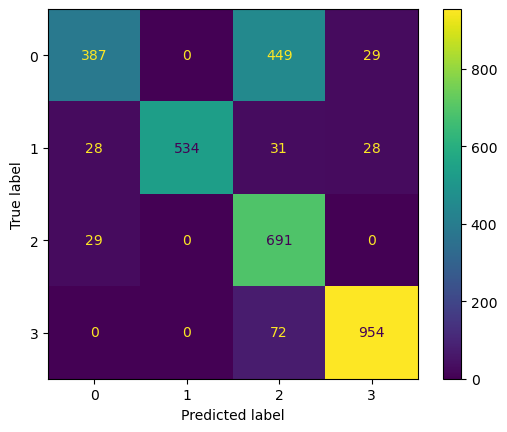

<Figure size 640x480 with 0 Axes>

In [35]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 100 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plt.savefig('confusion_matrix_gan23.png')

### Model 7
epochs = 27

[Go back to Table of Contents](#Table-of-Contents)

In [36]:
#compile and run the model
#how many epochs are required to generate an accurate model?
model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 27, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

results_model7 = pd.DataFrame(model.history.history)
print(results_model7.columns)

Epoch 1/27
28/28 [==============================] - 66s 2s/step - loss: 0.0110 - accuracy: 0.9735 - val_loss: 0.0756 - val_accuracy: 0.8482
Epoch 2/27
28/28 [==============================] - 62s 2s/step - loss: 0.0086 - accuracy: 0.9816 - val_loss: 0.0549 - val_accuracy: 0.8884
Epoch 3/27
28/28 [==============================] - 68s 2s/step - loss: 0.0078 - accuracy: 0.9839 - val_loss: 0.0587 - val_accuracy: 0.8795
Epoch 4/27
28/28 [==============================] - 67s 2s/step - loss: 0.0097 - accuracy: 0.9781 - val_loss: 0.0601 - val_accuracy: 0.8661
Epoch 5/27
28/28 [==============================] - 62s 2s/step - loss: 0.0099 - accuracy: 0.9781 - val_loss: 0.0837 - val_accuracy: 0.8214
Epoch 6/27
28/28 [==============================] - 65s 2s/step - loss: 0.0081 - accuracy: 0.9839 - val_loss: 0.0696 - val_accuracy: 0.8571
Epoch 7/27
28/28 [==============================] - 67s 2s/step - loss: 0.0053 - accuracy: 0.9885 - val_loss: 0.0619 - val_accuracy: 0.8750
Epoch 8/27
28/28 [==

Accuracy : 0.964326798915863, Val_Accuracy: 0.84375
Loss: 0.01586069166660309, Val_Loss: 0.07650689035654068


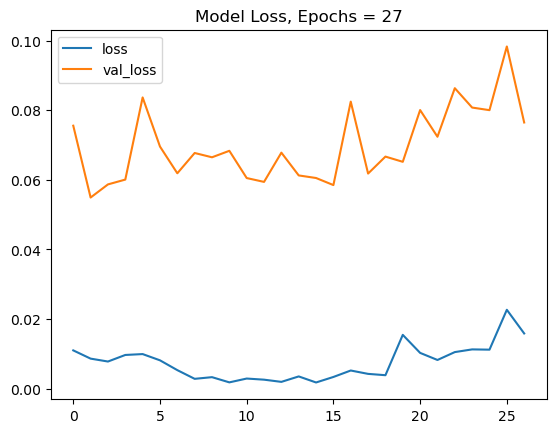

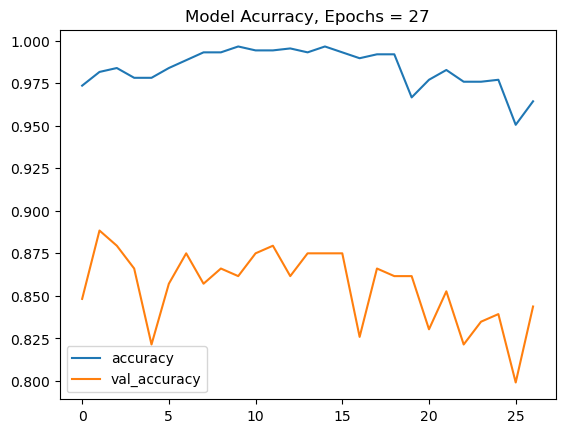

In [37]:
results_model7[['loss','val_loss']].plot(title='Model Loss, Epochs = 27')
plt.savefig('./loss_27.png')

results_model7[['accuracy','val_accuracy']].plot(title='Model Acurracy, Epochs = 27')
plt.savefig('./accuracy_27.png')


# Print the accuracy and loss
print("Accuracy : {}, Val_Accuracy: {}".format(results_model7['accuracy'].iloc[-1], results_model7['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results_model7['loss'].iloc[-1], results_model7['val_loss'].iloc[-1]))

101/101 [==============================] - 69s 677ms/step


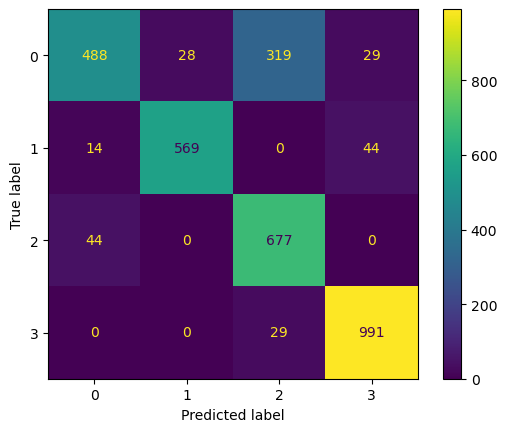

<Figure size 640x480 with 0 Axes>

In [39]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 100 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plt.savefig('confusion_matrix_gan27.png')

### Model 8
Epochs = 15

[Go back to Table of Contents](#Table-of-Contents)

In [5]:
#compile and run the model
#how many epochs are required to generate an accurate model?
model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 15, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

results_model8 = pd.DataFrame(model.history.history)
print(results_model8.columns)

Epoch 1/15
28/28 [==============================] - 60s 2s/step - loss: 0.1240 - accuracy: 0.5535 - val_loss: 0.0789 - val_accuracy: 0.7857
Epoch 2/15
28/28 [==============================] - 60s 2s/step - loss: 0.0974 - accuracy: 0.6904 - val_loss: 0.1043 - val_accuracy: 0.6920
Epoch 3/15
28/28 [==============================] - 61s 2s/step - loss: 0.0756 - accuracy: 0.7825 - val_loss: 0.0651 - val_accuracy: 0.8259
Epoch 4/15
28/28 [==============================] - 62s 2s/step - loss: 0.0631 - accuracy: 0.8274 - val_loss: 0.0717 - val_accuracy: 0.7723
Epoch 5/15
28/28 [==============================] - 62s 2s/step - loss: 0.0652 - accuracy: 0.8182 - val_loss: 0.0577 - val_accuracy: 0.8482
Epoch 6/15
28/28 [==============================] - 64s 2s/step - loss: 0.0625 - accuracy: 0.8216 - val_loss: 0.0695 - val_accuracy: 0.8080
Epoch 7/15
28/28 [==============================] - 61s 2s/step - loss: 0.0608 - accuracy: 0.8389 - val_loss: 0.0558 - val_accuracy: 0.8482
Epoch 8/15
28/28 [==

Accuracy : 0.8929804563522339, Val_Accuracy: 0.84375
Loss: 0.03960298001766205, Val_Loss: 0.06138698384165764


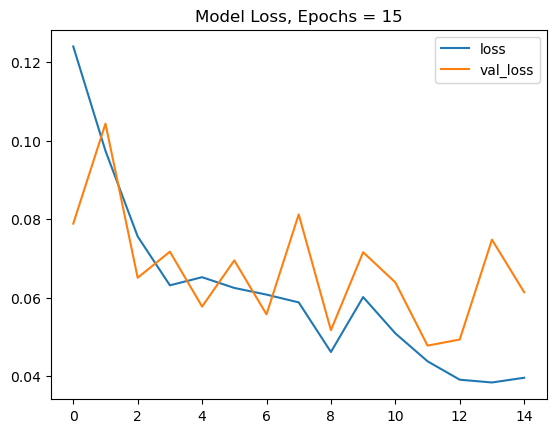

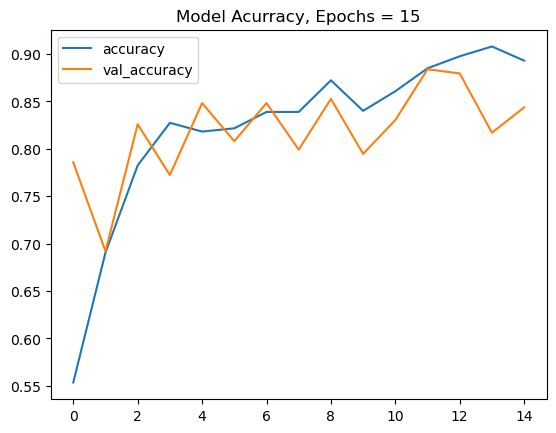

In [6]:
results_model8[['loss','val_loss']].plot(title='Model Loss, Epochs = 15')
plt.savefig('./loss_15.png')

results_model8[['accuracy','val_accuracy']].plot(title='Model Acurracy, Epochs = 15')
plt.savefig('./accuracy_15.png')


# Print the accuracy and loss
print("Accuracy : {}, Val_Accuracy: {}".format(results_model8['accuracy'].iloc[-1], results_model8['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results_model8['loss'].iloc[-1], results_model8['val_loss'].iloc[-1]))

101/101 [==============================] - 63s 616ms/step


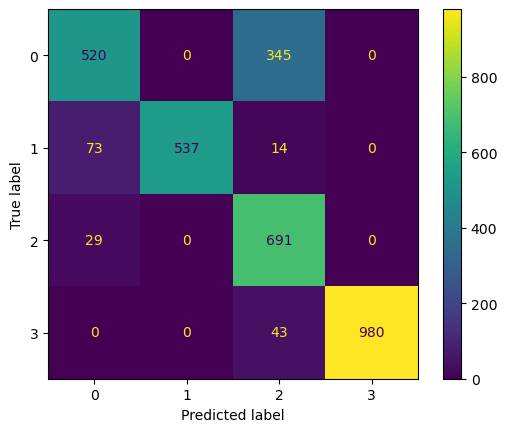

<Figure size 640x480 with 0 Axes>

In [7]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 100 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plt.savefig('confusion_matrix_gan27.png')
# 27 --> 15 잘못저장함. 

### Model 9
Epochs = 18

[Go back to Table of Contents](#Table-of-Contents)

In [8]:
#compile and run the model
#how many epochs are required to generate an accurate model?
model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 18, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

results_model9 = pd.DataFrame(model.history.history)
print(results_model9.columns)

Epoch 1/18
28/28 [==============================] - 56s 2s/step - loss: 0.0557 - accuracy: 0.8608 - val_loss: 0.0686 - val_accuracy: 0.8259
Epoch 2/18
28/28 [==============================] - 54s 2s/step - loss: 0.0388 - accuracy: 0.8999 - val_loss: 0.0498 - val_accuracy: 0.8705
Epoch 3/18
28/28 [==============================] - 56s 2s/step - loss: 0.0434 - accuracy: 0.8849 - val_loss: 0.0569 - val_accuracy: 0.8527
Epoch 4/18
28/28 [==============================] - 71s 3s/step - loss: 0.0368 - accuracy: 0.8987 - val_loss: 0.0569 - val_accuracy: 0.8571
Epoch 5/18
28/28 [==============================] - 60s 2s/step - loss: 0.0320 - accuracy: 0.9217 - val_loss: 0.0631 - val_accuracy: 0.8571
Epoch 6/18
28/28 [==============================] - 59s 2s/step - loss: 0.0412 - accuracy: 0.8976 - val_loss: 0.0623 - val_accuracy: 0.8438
Epoch 7/18
28/28 [==============================] - 54s 2s/step - loss: 0.0328 - accuracy: 0.9125 - val_loss: 0.0639 - val_accuracy: 0.8259
Epoch 8/18
28/28 [==

Accuracy : 0.9413118362426758, Val_Accuracy: 0.8125
Loss: 0.024156460538506508, Val_Loss: 0.08050365000963211


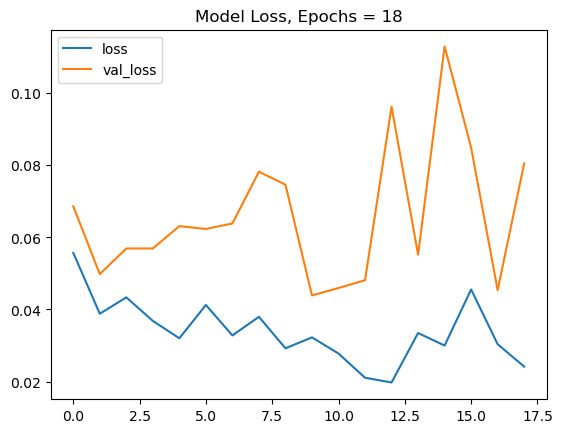

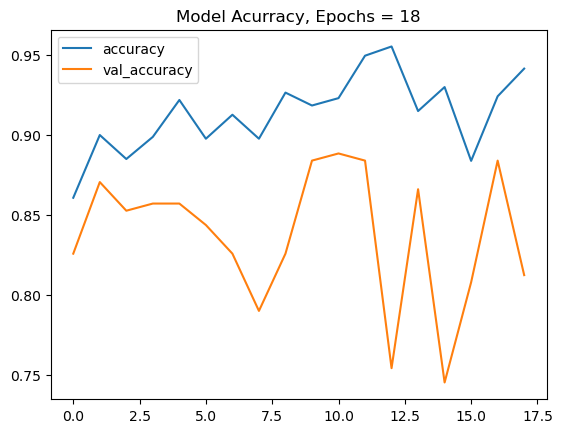

In [9]:
results_model9[['loss','val_loss']].plot(title='Model Loss, Epochs = 18')
plt.savefig('./loss_18.png')

results_model9[['accuracy','val_accuracy']].plot(title='Model Acurracy, Epochs = 18')
plt.savefig('./accuracy_18.png')


# Print the accuracy and loss
print("Accuracy : {}, Val_Accuracy: {}".format(results_model9['accuracy'].iloc[-1], results_model9['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results_model9['loss'].iloc[-1], results_model9['val_loss'].iloc[-1]))

101/101 [==============================] - 53s 523ms/step


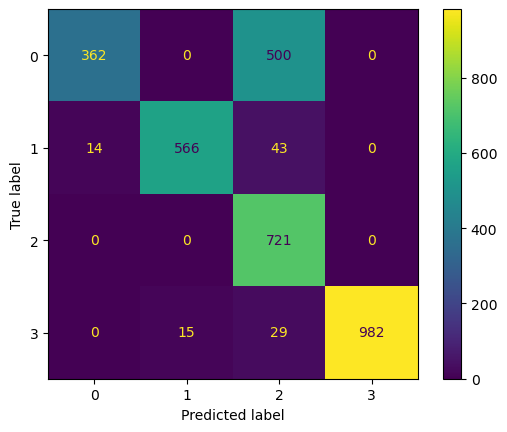

<Figure size 640x480 with 0 Axes>

In [10]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 100 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plt.savefig('confusion_matrix_gan18.png')

### Model 10
Epochs = 17

[Go back to Table of Contents](#Table-of-Contents)

In [11]:
#compile and run the model
#how many epochs are required to generate an accurate model?
model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 17, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

results_model10 = pd.DataFrame(model.history.history)
print(results_model10.columns)

Epoch 1/17
28/28 [==============================] - 62s 2s/step - loss: 0.0216 - accuracy: 0.9528 - val_loss: 0.0496 - val_accuracy: 0.8750
Epoch 2/17
28/28 [==============================] - 60s 2s/step - loss: 0.0189 - accuracy: 0.9565 - val_loss: 0.0458 - val_accuracy: 0.8929
Epoch 3/17
28/28 [==============================] - 52s 2s/step - loss: 0.0210 - accuracy: 0.9517 - val_loss: 0.0629 - val_accuracy: 0.8304
Epoch 4/17
28/28 [==============================] - 52s 2s/step - loss: 0.0179 - accuracy: 0.9574 - val_loss: 0.0492 - val_accuracy: 0.8839
Epoch 5/17
28/28 [==============================] - 55s 2s/step - loss: 0.0180 - accuracy: 0.9563 - val_loss: 0.0501 - val_accuracy: 0.8839
Epoch 6/17
28/28 [==============================] - 56s 2s/step - loss: 0.0262 - accuracy: 0.9344 - val_loss: 0.0606 - val_accuracy: 0.8348
Epoch 7/17
28/28 [==============================] - 56s 2s/step - loss: 0.0185 - accuracy: 0.9540 - val_loss: 0.0484 - val_accuracy: 0.8795
Epoch 8/17
28/28 [==

Accuracy : 0.9608745574951172, Val_Accuracy: 0.8214285969734192
Loss: 0.01572583243250847, Val_Loss: 0.07372536510229111


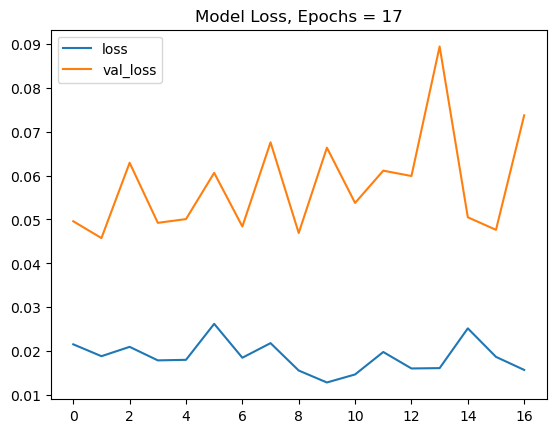

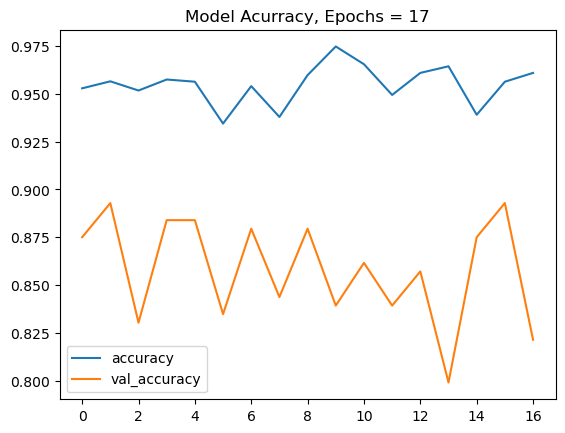

In [12]:
results_model10[['loss','val_loss']].plot(title='Model Loss, Epochs = 17')
plt.savefig('./loss_17.png')

results_model10[['accuracy','val_accuracy']].plot(title='Model Acurracy, Epochs = 17')
plt.savefig('./accuracy_17.png')


# Print the accuracy and loss
print("Accuracy : {}, Val_Accuracy: {}".format(results_model10['accuracy'].iloc[-1], results_model10['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results_model10['loss'].iloc[-1], results_model10['val_loss'].iloc[-1]))

101/101 [==============================] - 60s 591ms/step


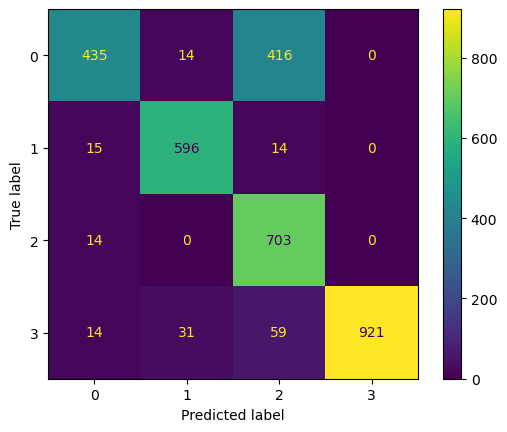

<Figure size 640x480 with 0 Axes>

In [13]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 100 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plt.savefig('confusion_matrix_gan17.png')

### Model 11
Epochs = 16

[Go back to Table of Contents](#Table-of-Contents)

In [14]:
#compile and run the model
#how many epochs are required to generate an accurate model?
model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 16, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

results_model11 = pd.DataFrame(model.history.history)
print(results_model11.columns)

Epoch 1/16
28/28 [==============================] - 66s 2s/step - loss: 0.0320 - accuracy: 0.9171 - val_loss: 0.0506 - val_accuracy: 0.8705
Epoch 2/16
28/28 [==============================] - 67s 2s/step - loss: 0.0171 - accuracy: 0.9563 - val_loss: 0.0528 - val_accuracy: 0.8750
Epoch 3/16
28/28 [==============================] - 59s 2s/step - loss: 0.0169 - accuracy: 0.9609 - val_loss: 0.0593 - val_accuracy: 0.8527
Epoch 4/16
28/28 [==============================] - 55s 2s/step - loss: 0.0119 - accuracy: 0.9701 - val_loss: 0.0467 - val_accuracy: 0.8839
Epoch 5/16
28/28 [==============================] - 56s 2s/step - loss: 0.0083 - accuracy: 0.9804 - val_loss: 0.0464 - val_accuracy: 0.8884
Epoch 6/16
28/28 [==============================] - 57s 2s/step - loss: 0.0107 - accuracy: 0.9747 - val_loss: 0.0525 - val_accuracy: 0.8750
Epoch 7/16
28/28 [==============================] - 59s 2s/step - loss: 0.0138 - accuracy: 0.9655 - val_loss: 0.0651 - val_accuracy: 0.8393
Epoch 8/16
28/28 [==

Accuracy : 0.9574223160743713, Val_Accuracy: 0.8482142686843872
Loss: 0.016416745260357857, Val_Loss: 0.06957880407571793


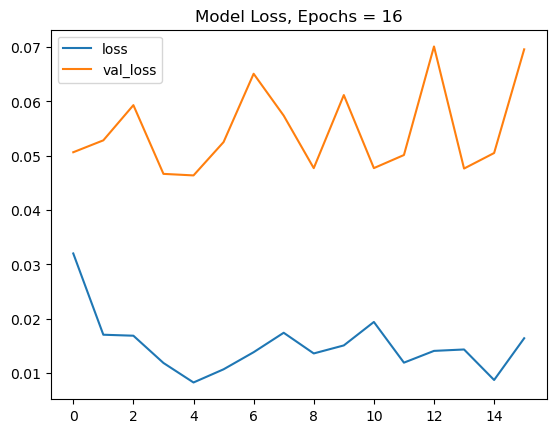

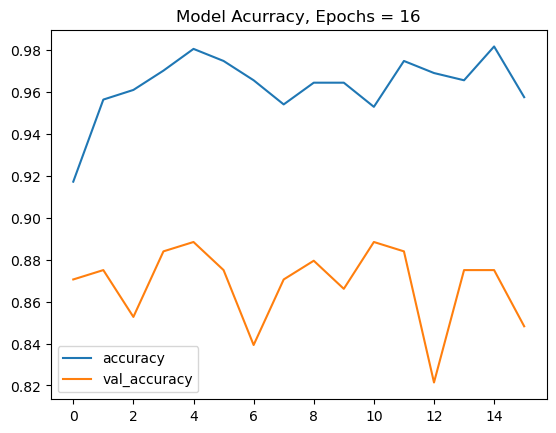

In [15]:
results_model11[['loss','val_loss']].plot(title='Model Loss, Epochs = 16')
plt.savefig('./loss_16.png')

results_model11[['accuracy','val_accuracy']].plot(title='Model Acurracy, Epochs = 16')
plt.savefig('./accuracy_16.png')


# Print the accuracy and loss
print("Accuracy : {}, Val_Accuracy: {}".format(results_model11['accuracy'].iloc[-1], results_model11['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results_model11['loss'].iloc[-1], results_model11['val_loss'].iloc[-1]))

101/101 [==============================] - 58s 573ms/step


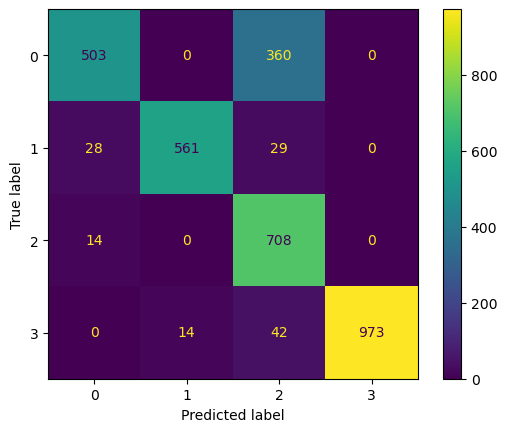

<Figure size 640x480 with 0 Axes>

In [16]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 100 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plt.savefig('confusion_matrix_gan16.png')

### Results
[Go back to the Table of Contents](#Table-of-Contents)

| 　       | Epochs | Accuracy |  Val_Accuracy | Loss   | Val_Loss |
|----------|--------|----------|---------------|--------|----------|
| Model 1  | 10     |   0.8688 |        0.8482 | 0.0509 |   0.0606 |
| Model 2  | 20     |   0.9724 |        0.8616 | 0.0111 |   0.0581 |
| Model 3  | 30     |   0.9933 |        0.8482 | 0.0032 |   0.0654 |
| Model 4  | 25     |   0.9827 |        0.8705 | 0.0071 |   0.0617 |
| Model 5  | 50     |   0.9919 |        0.8527 | 0.0037 |   0.0698 |
| Model 6  | 23     |   0.9574 |        0.7946 | 0.0200 |   0.1021 |
| Model 7  | 27     |   0.9643 |        0.8438 | 0.0159 |   0.0765 |
| Model 8  |     15 |   0.8930 |        0.8438 | 0.0396 |   0.0614 |
| Model 9  |     18 |   0.9413 |        0.8125 | 0.0242 |   0.0805 |
| Model 10 | 17     |   0.9609 |        0.8214 | 0.0157 |   0.0737 |
| Model 11 | 16     |   0.9574 |        0.8482 | 0.0164 |   0.0696 |

### GANs in weather prediction, What uses might it have?
 - Outline at least three ideas you have using a few sentences each.
 - Search for those ideas online and see if any other person or institution has researched it. If so, provide a link to the website.
 - Ideally, come up with your three ideas before you search online!

#### Uses of GANs in Weather Prediction

Typhoon Path Prediction: Using Generative Adversarial Networks (GANs) trained on historical typhoon imagery can help predict the path and intensity of typhoons. By generating virtual images that simulate different typhoon scenarios, these models could help in understanding and preparing for the potential impacts of typhoons on regions like Korea, which is prone to such natural disasters annually.

Link: [Prediction of a typhoon track using a generative adversarial network and satellite images](#https://www.nature.com/articles/s41598-019-42339-y)

2. Localized Precipitation Forecasting: As weather observation systems become more precise, GANs can enhance the granularity of weather predictions, such as localized rainfall. This could lead to more accurate, localized weather forecasting, making the process more efficient and cost-effective.

Link: [Two-Stage UA-GAN for Precipitation Nowcasting](#https://www.researchgate.net/publication/365765823_Two-Stage_UA-GAN_for_Precipitation_Nowcasting)

3. Predicting Extreme Weather Events: GANs could play a crucial role in predicting and preparing for extreme weather events by analyzing weather data for anomalies. If GANs detect deviations from expected weather patterns, these could be early warnings of extreme conditions, allowing for better preparedness.
   
Link: [Machine Learning Approaches to Extreme Weather Events Forecast in Urban Areas: Challenges and Initial Results](#https://www.researchgate.net/publication/362385156_Machine_Learning_Approaches_to_Extreme_Weather_Events_Forecast_in_Urban_Areas_Challenges_and_Initial_Results)  
Link: [https://paperswithcode.com/dataset/extremeweather](#https://paperswithcode.com/dataset/extremeweather)

